## Observations and Insights 

In [ ]:
# Some Observations and Inferences from the analysis
# •	Data integrity is very high:
 # o	Just one duplicate mice in the entire population accross all drug regimens 
 # o	Only one outlier in the population, the infubinol regimen data shown in the quantitative analysis and boxplots 
 # o	The proportion of male to female mouse in the population are even
# •	Summary Statistics: 
 # o	Capomulin and Ramicane are the most promising regimen with the lowest average tumor volume. 
 # o	Both regimens have the highest mouse count as shown in the bar chart
# •	Capomulin Regimen Analysis:
 # o	Line plot: As treatment timepoint increases there is a negative change in tumor volume for a single 
   #mouse treated with Capomulin 
 # o	Scatter plot: There is a positive correlation between tumor volume and mouse weight for the mouse 
    #population treated with Capomulin 
 # o	‘Correlation Coefficent: There is a positive correlation of 84% between mouse weight and tumor 
    # volume for the mouse population in the Capomulin regimen 
 # o	The R-square value of 71% showed that there is a good fit in the tumor volume data and mouse weight in the 
    #absence of other variables or considerations with 71% of variance in tumor volume explained by the mouse weight.

In [6]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [11]:
# Combine the data into a single dataset - merge with Mouse ID and outer merge to capture all information 
mouse_merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
mouse_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the DataFrame.
#mouse_merge_df.info()
mouse_count = len(mouse_merge_df["Mouse ID"].value_counts())
mouse_count
#There are 249 mice in the DataFrame 

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
#find duplicate Mouse ID in the mouse_metadata df, for this create a copy of the merged df
clean_merged_df = mouse_merge_df.copy()

In [28]:
clean_merged_df.info()
#1893 rows inclusive of duplicate mice

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [29]:
#Use the Pythons Pandas library for the function to find duplicate rows based on on all columns or specific columns
#Dataframe.duplicated(subset=None, Keep='first/last/False')
duplicateDf = clean_merged_df[clean_merged_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicateDf)

#Mouse ID g989 is the duplicate 

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicateInfo = clean_merged_df[clean_merged_df["Mouse ID"] == "g989"]
DuplicateInfo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
#find the indexes of the duplice Mouse ID
dupIndex = clean_merged_df[clean_merged_df["Mouse ID"] == "g989"].index
dupIndex

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [32]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop the duplicate Mouse ID from the df
clean_merged_df.drop(dupIndex, inplace=True)

In [33]:
#check on the number of mouse after dropping the duplicate mice
mice_ct = len(clean_merged_df["Mouse ID"].value_counts())
mice_ct

248

In [34]:
#confirm there are no more duplicate MOuse ID in the clean df 
duplicateDD = clean_merged_df[clean_merged_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicateDD)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [35]:
#check new number of rows in the clean df 
clean_merged_df.info()
#1880 rows in the clean df as opposed to the original 1893 rows in ln [594]above

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [36]:
clean_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [38]:
#Create a groupby series with Drug Regimen on the clean Dataframe 
GrpbyRegimen = clean_merged_df.groupby(["Drug Regimen"])
#GrpbyRegimen.head()

In [39]:
Mean_Regimen= GrpbyRegimen["Tumor Volume (mm3)"].mean()
Mean_Regimen

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [40]:
Median_Regimen= GrpbyRegimen["Tumor Volume (mm3)"].median()
Median_Regimen

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [41]:
Var_Regimen= GrpbyRegimen["Tumor Volume (mm3)"].var()
Var_Regimen

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [42]:
Std_Regimen= GrpbyRegimen["Tumor Volume (mm3)"].std()
Std_Regimen

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [43]:
SEM_Regimen= GrpbyRegimen["Tumor Volume (mm3)"].sem()
SEM_Regimen

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [44]:
Summary1_Df = pd.DataFrame({"Mean":Mean_Regimen,"Median":Median_Regimen,"Variance":Var_Regimen,
                           "Std. Deviation":Std_Regimen,"SEM":SEM_Regimen})
Summary1_Df

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

In [46]:
#Single line gropby method 1
Summary4_df = pd.DataFrame(clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean= np.mean, 
                                                 Median=np.median, Variance=np.var, Std_Deviation=np.std,
                                                 SEM=st.sem))
                                                    
Summary4_df

,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
#Single line groupby method 2
Summary3_df = pd.DataFrame(clean_merged_df.groupby("Drug Regimen").agg(Mean=("Tumor Volume (mm3)",np.mean),
                                                      Meadian=("Tumor Volume (mm3)", np.median),
                                                      Variance=("Tumor Volume (mm3)", np.var),
                                                      Std_Deviation=("Tumor Volume (mm3)", np.std),
                                                      SEM=("Tumor Volume (mm3)",st.sem)))

#Summary3_df

## Bar Plots

In [48]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of 
#the study using pandas.

In [49]:
#Pandas Bar Chart- for this purpose create a new groupby Drug Regimen df
Regimen_and_Timepoint1 = pd.DataFrame(clean_merged_df.groupby(["Drug Regimen"]).count())

In [50]:
#Reset index and passed inplace = True to have Drug Regimen as column
Regimen_and_Timepoint1.reset_index(inplace=True)
#Regimen_and_Timepoint1.head()

In [51]:
#Filter to the columns required for bar chart
Regimen_and_Timepoint1 = Regimen_and_Timepoint1[["Drug Regimen","Mouse ID"]]
#Set Index back to Drug Regimen 
Regimen_and_Timepoint1 = Regimen_and_Timepoint1.set_index("Drug Regimen")

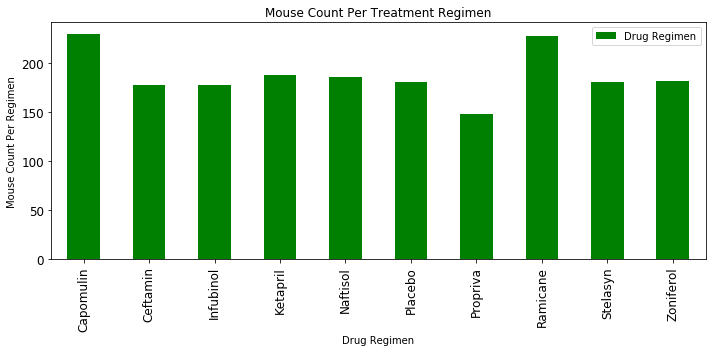

In [153]:
#Generate panda bar chart and save to file 
PandaBar = Regimen_and_Timepoint1.plot(kind="bar", figsize=(10,5), title="Mouse Count Per Treatment Regimen",
                                       color="green", fontsize=12)
#Set legends and labels 
PandaBar.set_xlabel("Drug Regimen")
PandaBar.set_ylabel("Mouse Count Per Regimen")
PandaBar.legend(["Drug Regimen"])

plt.tight_layout()

#save and show plot
plt.savefig("Charts/PandaBar.pdf")
plt.show()

In [53]:
# PyPlot Bar: Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study 
#for this purpose create a new groupby object and a df
Regimen_and_Timepoint2 = pd.DataFrame(clean_merged_df.groupby(["Drug Regimen"]).count())

In [54]:
#set x axis and tick locations
x_axis = np.arange(len(Regimen_and_Timepoint2))
tick_locations = [value for value in x_axis]

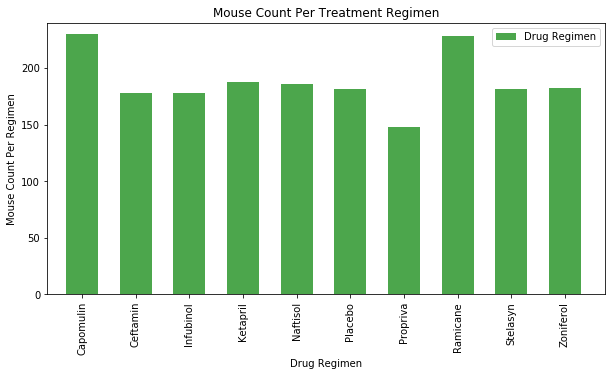

In [164]:
#Pyplot bar plot
plt.figure(figsize=(10,5))
plt.bar(x_axis, Regimen_and_Timepoint2["Mouse ID"], color="g", alpha=0.7, width = 0.6, align="center")
plt.xticks(tick_locations, list(Regimen_and_Timepoint2.index), rotation="vertical")

#set x and y limits 
plt.xlim(-0.65, len(x_axis)-0.25)
plt.ylim(0,max(Regimen_and_Timepoint2["Mouse ID"])+10)

#Generate title and labels
plt.title("Mouse Count Per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count Per Regimen")
legend = ["Drug Regimen"]
plt.legend(legend, loc="best")

#save and show graph

#plt.tight_layout()
plt.savefig("Charts/PyPlotBar.pdf")
plt.show()

## Pie Plots

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [57]:
#create a new groupby object and a df for the pie chart
female_vs_male = pd.DataFrame(clean_merged_df.groupby(["Sex"]).count())
#female_vs_male.head()

In [58]:
#Del
#sex_count = female_vs_male.loc[Mouse ID]

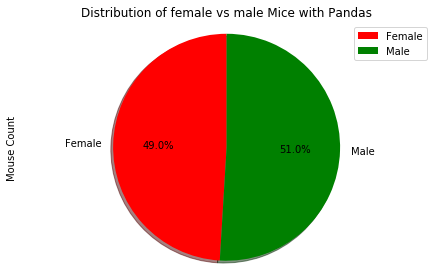

In [62]:
#Panda pieplot
#create list for chart colors
colors = ["red", "green"]
femaleVsmale_pie = female_vs_male.plot(kind="pie", y="Mouse ID", colors=colors, 
                   title="Distribution of female vs male Mice with Pandas",
                   autopct="%1.1f%%", shadow=True, startangle=90)
femaleVsmale_pie.set_ylabel("Mouse Count")
plt.tight_layout()
plt.axis("equal")

#save and show panda pie chart 
plt.savefig("Charts/PandaPie.pdf")
plt.show()

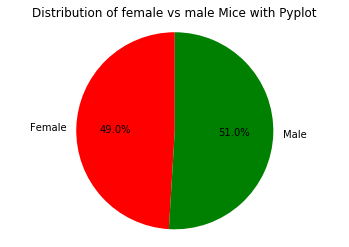

In [63]:
#Pyplot pie: Generate a pie plot showing the distribution of female versus male mice using pyplot
#Create lists for chart labels and colors
gender = ["Female", "Male"]
colors = ["red", "green"]
#plot pyplot bar
plt.pie(female_vs_male["Mouse ID"], labels = gender, colors=colors, autopct="%1.1f%%",startangle=90)
plt.title("Distribution of female vs male Mice with Pyplot")

#set axis, save and show chart 
plt.axis("equal")
plt.savefig("Charts/PyplotPie.pdf")
plt.show()


## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [120]:
#filter df to the 4 best Regimens using OR condition and use loc to create a new df 
Best4_Regimen_filter = (clean_merged_df["Drug Regimen"] == "Capomulin") |\
                       (clean_merged_df["Drug Regimen"] == "Ramicane")|\
                       (clean_merged_df["Drug Regimen"] == "Infubinol") |\
                       (clean_merged_df["Drug Regimen"] == "Ceftamin")
Best4_Regimen_df = clean_merged_df.loc[Best4_Regimen_filter]
Best4_Regimen_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
#Filter to columns needed for analysis
Best4_Regimen1_df = Best4_Regimen_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
#Best4_Regimen1_df

In [123]:
#Create a groupby object with the Best4Regimen DF and pass on the lambda anonymous function as an aggregate with the 
#groupby to return the last indexed [-1] tumor vol which will be the final volume for each mouse
#reference ... https/realpython.com/python-lambda/
Best4=  pd.DataFrame(Best4_Regimen1_df.groupby(["Mouse ID", "Drug Regimen"]).agg({"Tumor Volume (mm3)"\
                                                                                 : lambda a: a.iloc[-1]}))
Best4

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [124]:
#Reset index to make Drug Regimen a column 
Best4.reset_index(inplace=True)
Best4

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [125]:
#Capomulin Analysis 
#filter to Capomulin and sort Tumor values into acsending order (default)
CapomulinAnalysis = Best4[Best4["Drug Regimen"] == "Capomulin"]
CapomulinAnalysis.sort_values(by=["Tumor Volume (mm3)"])


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
70,s185,Capomulin,23.343598
51,m601,Capomulin,28.430964
90,x401,Capomulin,28.484033
24,f966,Capomulin,30.485985
78,u364,Capomulin,31.023923
96,y793,Capomulin,31.896238
65,r554,Capomulin,32.377357
53,m957,Capomulin,33.329098
73,t565,Capomulin,34.455298
88,w914,Capomulin,36.041047


In [126]:
# Determine if there are any potential outliers in the Capomulin Tumor Volume data 
quartiles = CapomulinAnalysis["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin regimen tumor volume is: {lowerq}")
print(f"The upper quartile of capomulin regimen tumor volume is: {upperq}")
print(f"The interquartile range of capomulin regimen tumor volume is: {iqr}")
print(f"The the median of capomulin regimen tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_capomulin = CapomulinAnalysis.loc[(CapomulinAnalysis["Tumor Volume (mm3)"] \
                                       < lower_bound) | (CapomulinAnalysis["Tumor Volume (mm3)"] > upper_bound)]
outlier_capomulin

The lower quartile of capomulin regimen tumor volume is: 32.37735684
The upper quartile of capomulin regimen tumor volume is: 40.1592203
The interquartile range of capomulin regimen tumor volume is: 7.781863460000004
The the median of capomulin regimen tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)


In [127]:
#Ramicane Analysis 
#filter to Ramicane and sort Tumor values into acsending order (default)
RamicaneAnalysis = Best4[Best4["Drug Regimen"] == "Ramicane"]
RamicaneAnalysis.sort_values(by=["Tumor Volume (mm3)"])

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
40,k403,Ramicane,22.050126
27,g791,Ramicane,29.128472
71,s508,Ramicane,30.276232
50,m546,Ramicane,30.564625
98,z578,Ramicane,30.638696
54,n364,Ramicane,31.095335
37,j913,Ramicane,31.560470
7,a644,Ramicane,32.978522
17,c758,Ramicane,33.397653
29,i177,Ramicane,33.562402


In [128]:
# Determine if there are any potential outliers in the Ramicane Tumor Volume data 
quartiles = RamicaneAnalysis["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane regimen tumor volume is: {lowerq}")
print(f"The upper quartile of ramicane regimen tumor volume is: {upperq}")
print(f"The interquartile range of ramicane regimen tumor volume is: {iqr}")
print(f"The the median of ramicane ramicane tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_ramicane = RamicaneAnalysis.loc[(RamicaneAnalysis["Tumor Volume (mm3)"] \
                                       < lower_bound) | (RamicaneAnalysis["Tumor Volume (mm3)"] > upper_bound)]
outlier_ramicane

The lower quartile of ramicane regimen tumor volume is: 31.56046955
The upper quartile of ramicane regimen tumor volume is: 40.65900627
The interquartile range of ramicane regimen tumor volume is: 9.098536719999998
The the median of ramicane ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)


In [129]:
#Infubinol Analysis 
#filter to Infubinol and sort Tumor values into acsending order (default)
InfubinolAnalysis = Best4[Best4["Drug Regimen"] == "Infubinol"]
InfubinolAnalysis.sort_values(by=["Tumor Volume (mm3)"])


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
15,c326,Infubinol,36.321346
58,o813,Infubinol,45.699331
79,v339,Infubinol,46.250112
52,m756,Infubinol,47.010364
85,w193,Infubinol,50.005138
81,v766,Infubinol,51.542431
80,v719,Infubinol,54.048608
60,q132,Infubinol,54.656549
57,o809,Infubinol,55.629428
69,s121,Infubinol,55.650681


In [130]:
# Determine if there are any potential outliers in the infubinol Tumor Volume data 
quartiles = InfubinolAnalysis["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infubinol regimen tumor volume is: {lowerq}")
print(f"The upper quartile of infubinol regimen tumor volume is: {upperq}")
print(f"The interquartile range of infubinol regimen tumor volume is: {iqr}")
print(f"The the median of ramicane infubinol tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_infubinol = InfubinolAnalysis.loc[(InfubinolAnalysis["Tumor Volume (mm3)"] \
                                       < lower_bound) | (InfubinolAnalysis["Tumor Volume (mm3)"] > upper_bound)]
outlier_infubinol

The lower quartile of infubinol regimen tumor volume is: 54.04860769
The upper quartile of infubinol regimen tumor volume is: 65.52574285
The interquartile range of infubinol regimen tumor volume is: 11.477135160000003
The the median of ramicane infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
15,c326,Infubinol,36.321346


In [131]:
#Ceftamin Analysis 
#filter to Ceftamin and sort Tumor values into acsending order (default)
CeftaminAnalysis = Best4[Best4["Drug Regimen"] == "Ceftamin"]
CeftaminAnalysis.sort_values(by=["Tumor Volume (mm3)"])

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
89,x226,Ceftamin,45.000000
10,b447,Ceftamin,45.000000
76,u153,Ceftamin,45.000000
74,t573,Ceftamin,45.000000
46,l558,Ceftamin,46.784535
28,h531,Ceftamin,47.784682
23,f436,Ceftamin,48.722078
75,u149,Ceftamin,52.925348
13,b759,Ceftamin,55.742829
11,b487,Ceftamin,56.057749


In [132]:
# Determine if there are any potential outliers in the Ceftamin Tumor Volume data 
quartiles = CeftaminAnalysis["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ceftamin regimen tumor volume is: {lowerq}")
print(f"The upper quartile of ceftamin regimen tumor volume is: {upperq}")
print(f"The interquartile range of ceftamin regimen tumor volume is: {iqr}")
print(f"The the median of ramicane ceftamin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_ceftamin = CeftaminAnalysis.loc[(CeftaminAnalysis["Tumor Volume (mm3)"] \
                                       < lower_bound) | (CeftaminAnalysis["Tumor Volume (mm3)"] > upper_bound)]
outlier_ceftamin

The lower quartile of ceftamin regimen tumor volume is: 48.72207785
The upper quartile of ceftamin regimen tumor volume is: 64.29983003
The interquartile range of ceftamin regimen tumor volume is: 15.577752179999997
The the median of ramicane ceftamin tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)


In [133]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [134]:
#Create and generate a list to hold all 4 regimen data needed for boxplots 
BoxPlot_Data = []
BoxPlot_Data.append(CapomulinAnalysis["Tumor Volume (mm3)"])
BoxPlot_Data.append(RamicaneAnalysis["Tumor Volume (mm3)"])
BoxPlot_Data.append(InfubinolAnalysis["Tumor Volume (mm3)"])
BoxPlot_Data.append(CeftaminAnalysis["Tumor Volume (mm3)"])
#Create list for box labels 
Best4Regimen =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

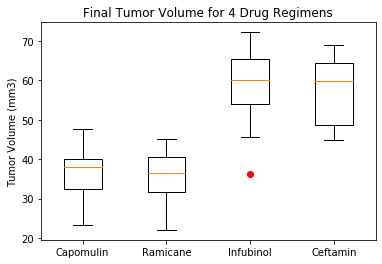

In [135]:
#plot boxplots for all 4 regimen on the same plot 
fig1, ax1=plt.subplots()
ax1.set_title("Final Tumor Volume for 4 Drug Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2,3,4], Best4Regimen)
plt.savefig("Charts/Boxplots.pdf")
plt.show()

## Line and Scatter Plots

In [136]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [137]:
#create filter to show all mouse treated with Capomulin
Mouse_Capomulin = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Capomulin"]
Mouse_Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [138]:
#filetr the df to only Capomulin regimen for any mouse from previous cell
Single_Mouse_filter = (clean_merged_df["Mouse ID"] =="s185") & (clean_merged_df["Drug Regimen"] == "Capomulin")
#Passed loc on the df with the single mouse filter 
Capomulin_df = clean_merged_df.loc[Single_Mouse_filter]
#use loc to slice to rows and columns needed for line plot
Capomulin_df = Capomulin_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
#Capomulin_data.head()
Capomulin_df

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


In [139]:
#set index of df to Timepoint and passed in place is True to ensure its permanent 
Capomulin_df.set_index("Timepoint", inplace=True)

In [140]:
Capomulin_df.head()

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,43.878496
10,37.614948
15,38.177232
20,36.866876


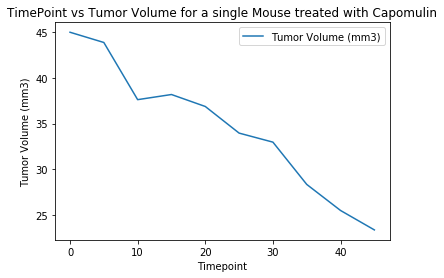

In [141]:
#plot, set labels and title
Capomulin_df.plot()
plt.title("TimePoint vs Tumor Volume for a single Mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
#plt.grid()
#save and show plot
plt.savefig("Charts/Capomulin_SingleMouse.pdf")
plt.show()

In [142]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



In [143]:
#create a groupby object from the previuosly filtred Capomulin df
grpbyscatter = Mouse_Capomulin.groupby(["Mouse ID","Weight (g)"])
#grpbyscatter.head()

In [144]:
#passed the aggregate mean function on the groupby series to calculate average tumor vol per mice
capomulin_avgvol = grpbyscatter["Tumor Volume (mm3)"].mean()
capomulin_avgvol

Mouse ID  Weight (g)
b128      22            41.963636
b742      21            40.083699
f966      17            36.505973
g288      19            41.990097
g316      22            44.613344
i557      24            44.805810
i738      20            39.141053
j119      23            44.465236
j246      21            43.216925
l509      21            44.434474
l897      19            42.507261
m601      17            34.847470
m957      19            39.049816
r157      25            45.798970
r554      17            36.509212
r944      25            43.367364
s185      17            34.559143
s710      23            42.803733
t565      17            39.328725
u364      17            39.887495
v923      21            41.581595
w150      23            41.384825
w914      21            41.352452
x401      15            36.182040
y793      17            38.506829
Name: Tumor Volume (mm3), dtype: float64

In [145]:
#create a df from the aggregated groupby object 
capomulin_avgvol_df = pd.DataFrame(capomulin_avgvol)
capomulin_avgvol_df.head()

,,Tumor Volume (mm3)
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [147]:
#check on the infor for the df to ensure columns needed for scatter are available and correct Dtype
capomulin_avgvol_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25 entries, ('b128', 22) to ('y793', 17)
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tumor Volume (mm3)  25 non-null     float64
dtypes: float64(1)
memory usage: 1.2+ KB


In [148]:
#reset index of the df back to all columns 
capmod_avgvol_df=capomulin_avgvol_df.reset_index()

In [149]:
capmod_avgvol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            25 non-null     object 
 1   Weight (g)          25 non-null     int64  
 2   Tumor Volume (mm3)  25 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes


The r-squared is: 0.7088568047708717


<function matplotlib.pyplot.show(*args, **kw)>

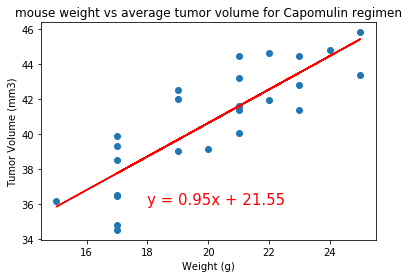

In [150]:
#Define x and y variables for scatter plot
x_values = capmod_avgvol_df["Weight (g)"]
y_values = capmod_avgvol_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (18,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("mouse weight vs average tumor volume for Capomulin regimen")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Charts/ScatterPlot.pdf")
plt.show

## Correlation and Regression

In [151]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [152]:
#correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capmod_avgvol_df.iloc[:,1]
tumor_vol = capmod_avgvol_df.iloc[:,2]
correlation = st.pearsonr(mouse_weight,tumor_vol)
print(f"The correlation between mouse weight and average tumor volume for Capomulin regimen is \
{round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for Capomulin regimen is 0.84
